<a href="https://colab.research.google.com/github/thebabycode/ML/blob/main/ML_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Use makeblobs() to create a synthetic dataset of 100 samples with 2 classes.Apply SVM based classification and regression  for the synthetic dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set()

[[ 3.35320909e+00  1.69958043e+00]
 [ 1.36678633e+00  6.34971633e-01]
 [ 2.24592863e-01  4.77028154e+00]
 [ 4.43598630e-01  3.11530945e+00]
 [ 2.76808540e+00  1.08782923e+00]
 [ 1.25566754e+00  3.38204112e+00]
 [ 1.00372519e+00  4.19147702e+00]
 [ 3.20903274e+00  1.78597253e+00]
 [ 7.43873988e-01  4.12240568e+00]
 [ 1.57322172e+00  4.83933793e-01]
 [ 7.67522789e-01  4.39759671e+00]
 [ 1.83375842e+00  7.54036153e-01]
 [ 1.10123507e+00  4.88977075e+00]
 [ 4.31891060e-01  4.33495456e+00]
 [ 1.89446550e+00  1.37913750e+00]
 [ 3.48515439e+00  1.46435135e+00]
 [ 2.73124907e+00  2.49704755e-01]
 [ 5.72793810e-01  4.08805543e+00]
 [ 1.26572308e+00  6.20712897e-01]
 [ 1.59331788e+00  1.22121317e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 7.89338559e-01  4.33748653e+00]
 [ 1.61152972e+00  1.82347242e+00]
 [ 2.77180174e-01  4.84428322e+00]
 [ 2.36923352e+00  7.94735861e-01]
 [ 9.14338767e-01  4.55014643e+00]
 [ 1.60841463e+00  4.01800537e-01]
 [ 9.82570091e-01  5.37530962e+00]
 [ 1.24258802e+00  4

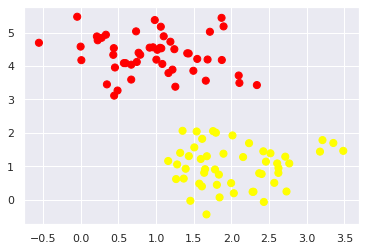

In [ ]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn");
print(X,y)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=109) # 70% training and 30% test


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8929245664785215


In [ ]:
print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")


intercept: 1.0572051773275974
slope: [ 0.0686877  -0.24707847]


In [ ]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

print(f"slope: {new_model.coef_}")

intercept: [1.05720518]
slope: [[ 0.0686877  -0.24707847]]


In [ ]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 0.86759967  0.99419877 -0.10600193  0.31794905  0.97855942  0.30782455
  0.09052502  0.8363509   0.08974248  1.04569654  0.02337308  0.99685573
 -0.0753106   0.01579683  0.84657647  0.93478273  1.18311173  0.08647858
  0.99077999  0.86491104  0.01121403  0.03972349  0.71735667 -0.12067405
  1.02358026 -0.00423422  1.06840722 -0.20342763  0.02971625  0.79224175
  1.15507986  0.0187905   0.92333556  1.15494707  0.68450164  0.13614366
  0.94407361  0.71977294  0.29090675  0.84998624  0.22818963 -0.09376857
 -0.2986269   0.17899238  0.64009975  0.88931091  1.14813092  1.16582692
 -0.07490113 -0.13695016  1.07088465  0.88371188 -0.15883553 -0.02917089
  0.37003774  0.00652636  0.33830066  0.95521849  0.96728398  1.23985121
  0.85009927  0.12248363 -0.13955818  0.94388541 -0.14876566  0.67001069
  0.11081467  0.28273529  0.92476233  0.20653921  0.20040927  1.07034509
  0.91923194  0.07181612  0.2832942   0.08852298  0.83291516  0.86517679
  0.10482887 -0.00377068  0.657

In [ ]:
y_pred = model.intercept_ + model.coef_ * X
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 1.2875294   0.63727544]
 [ 1.15108659  0.90031736]
 [ 1.07263194 -0.12142869]
 [ 1.08767495  0.28747928]
 [ 1.2473386   0.78842599]
 [ 1.14345409  0.22157563]
 [ 1.12614875  0.02158144]
 [ 1.27762626  0.61592981]
 [ 1.10830017  0.03864748]
 [ 1.16526616  0.93763556]
 [ 1.10992455 -0.02934629]
 [ 1.18316183  0.87089908]
 [ 1.13284648 -0.1509519 ]
 [ 1.08687078 -0.01386877]
 [ 1.18733166  0.71644999]
 [ 1.29659242  0.69539548]
 [ 1.2448084   0.99550851]
 [ 1.09654907  0.04713469]
 [ 1.14414479  0.90384038]
 [ 1.16664652  0.75546969]
 [ 1.13064871 -0.06222951]
 [ 1.11142303 -0.01449436]
 [ 1.16789745  0.6066644 ]
 [ 1.07624405 -0.13971292]
 [ 1.21994238  0.86084306]
 [ 1.12000901 -0.06703805]
 [ 1.16768348  0.95792891]
 [ 1.12469566 -0.27091811]
 [ 1.14255569 -0.05563426]
 [ 1.21066796  0.63877897]
 [ 1.21389026  0.99839477]
 [ 1.12700427 -0.05100859]
 [ 1.15286225  0.82767849]
 [ 1.21469725  0.99745499]
 [ 1.18044296  0.56126386]
 [ 1.17284352  0.02050532]
 [ 1.170

In [ ]:
x_new = np.arange(5).reshape((-1, 1))
x_new


array([[0],
       [1],
       [2],
       [3],
       [4]])

2. Explore the performance of the model with various kernels and discuss the role of hyper parameters

#LINER SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#POLYNOMIAL KERNAL

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#2. Gaussian Kernel


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 6]
 [3 6]]
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20



#HYPER PARAMETERS

Hyperparameters
Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

As a machine learning engineer designing a model, you choose and set hyperparameter values that your learning algorithm will use before the training of the model even begins. In this light, hyperparameters are said to be external to the model because the model cannot change its values during learning/training.

Hyperparameters are used by the learning algorithm when it is learning but they are not part of the resulting model. At the end of the learning process, we have the trained model parameters which effectively is what we refer to as the model. The hyperparameters that were used during training are not part of this model. We cannot for instance know what hyperparameter values were used to train a model from the model itself, we only know the model parameters that were learned.

Basically, anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter.



Here are some common examples
**Train-test split ratio**
**Learning rate in optimization algorithms** (e.g. gradient descent)
Choice of **optimization algorithm** (e.g., gradient descent, stochastic gradient descent, or Adam optimizer)
Choice of **activation function in a neural network **(nn) layer (e.g. Sigmoid, ReLU, Tanh)
The choice of **cost or loss function the model will use**
Number of hidden layers in a nn
Number of activation units in each layer
The drop-out rate in nn (dropout probability)
Number of iterations (epochs) in training a nn
Number of clusters in a clustering task
Kernel or filter size in convolutional layers
Pooling size
Batch size